In [1]:
class VariableStar():
    
    """ 
    Read data.txt file and save the name, RA, DEC, date and color index of the variablestar and make some plots.
    
    Functions: __init__(self, filename); plot(self); plotInMJD(self); getRaDec(self); getLB(self); WhatsTime(self)
    
    """
    
    def __init__(self, filename):
        
        """
        
        Instance Variables:
        -----------------
        
        self.name: string
        the name of the variablestar.
        
        self.RA: string
        the RA of the variablestar.
        
        self.DEC: string
        the DEC of the variablestar.
        
        self.data: dictionary
        save the date(key='JD'), V-index(key='Vmag'), U-B index(key='U-B'), B-V index(key='B-V'),
        V-R index(key='V-R'), R-I index(key='R-I'), Reference(key='Ref') and Note(key='Note').
        
        self.len_data: int
        the length of self.data.
        
        """
        
        import pandas as pd

        self.data=pd.read_table('data.txt',header=None,skiprows=30, sep='|',
                        names = ['JD', 'Vmag', 'U-B','B-V','V-R','R-I','Ref','Note'],
                        skipfooter=1,na_values=["*","99.99"],engine='python')
        name=pd.read_table('data.txt',skiprows=2, 
                           sep=' ',skipfooter=443,usecols=[1],names=['name'],engine='python')
        RA=pd.read_table('data.txt',skiprows=18, 
                          sep=':',skipfooter=427,usecols=[1],names=['RA'],engine='python')
        DEC=pd.read_table('data.txt',skiprows=19,
                          sep=':',skipfooter=426,usecols=[1],names=['DEC'],engine='python')
        
        self.name=name['name'][0]
        self.RA=RA['RA'][0]
        self.DEC=DEC['DEC'][0]
        self.len_data=len(self.data['JD'])
        
        #super(VariableStar, self).__init__()

    def plot(self):
        
        """ Get a beautiful plot of time v.s. all bands. Sticks of the x axis are in format of 2014-11-23T10:23:10. """
        
        from astropy.time import Time
        import matplotlib.pyplot as plt
        
        times,U,V,B,R,I=[],[],[],[],[],[]
        
        for i in range(self.len_data):
            times.append(self.data['JD'][i]+2440000)
            V.append(self.data['Vmag'][i])
            B.append(self.data['B-V'][i]+V[i])
            U.append(self.data['U-B'][i]+B[i])
            R.append(V[i]-self.data['V-R'][i])
            I.append(R[i]-self.data['R-I'][i])
        
        t=Time(times,format='jd')
        t=t.isot
       
        plt.figure(figsize=(16,10))
        
        plt.plot(times,U,'b.',label='U')
        plt.plot_date(times,B,'c.',label='B')
        plt.plot_date(times,V,'y.',label='V')
        plt.plot_date(times,R,'m.',label='R')
        plt.plot_date(times,I,'r.',label='I')
        plt.title('time v.s. all bands (ISO)\n',fontsize=20)
        plt.ylabel('magnitude (mag)',fontsize=12)
        plt.xlabel('date (ISO)',fontsize=12)
        plt.xlim(times[0]-100,times[self.len_data-1]+100)
        plt.ylim(10.5,17.6)
        plt.xticks([times[0],times[3],times[100],times[414]],[t[0],t[3],t[100],t[414]])
        
        plt.legend(loc='upper left')
        plt.show()
        #return self.plot.__doc__  
        
    def plotInMJD(self):
        
        """ Get a beautiful plot of time v.s. all bands. Sticks of the x axis are in format of MJD. """
        
        from astropy.time import Time
        import matplotlib.pyplot as plt
        
        times,U,V,B,R,I=[],[],[],[],[],[]
      
        for i in range(self.len_data):
            times.append(self.data['JD'][i]+2440000)
            V.append(self.data['Vmag'][i])
            B.append(self.data['B-V'][i]+V[i])
            U.append(self.data['U-B'][i]+B[i])
            R.append(V[i]-self.data['V-R'][i])
            I.append(R[i]-self.data['R-I'][i])
        
        t=Time(times,format='jd')
        t=t.mjd
       
        plt.figure(figsize=(16,10))
        
        plt.plot(times,U,'b.',label='U')
        plt.plot_date(times,B,'c.',label='B')
        plt.plot_date(times,V,'y.',label='V')
        plt.plot_date(times,R,'m.',label='R')
        plt.plot_date(times,I,'r.',label='I')
        plt.title('time v.s. all bands (MJD)\n',fontsize=20)
        plt.ylabel('magnitude (mag)',fontsize=12)
        plt.xlabel('date (ISO)',fontsize=12)
        plt.xlim(times[0]-100,times[self.len_data-1]+100)
        plt.ylim(10.5,17.6)
        plt.xticks([times[0],times[3],times[100],times[414]],[t[0],t[3],t[100],t[414]])
        
        plt.legend(loc='upper left')
        plt.show()
        #return self.plot.__doc__ 
        
    def getRaDec(self):
        
        """ Get the ra(degree) and dec(degree) of the variablestar. """
        
        from astropy import units as u
        from astropy.coordinates import SkyCoord
        
        return SkyCoord(self.RA+' '+self.DEC,unit=(u.hourangle, u.deg))
     
    def getLB(self):
        
        """ Get the galactic coordinates of the variablestar. """
        
        from astropy import units as u
        from astropy.coordinates import SkyCoord
        
        return SkyCoord(self.RA+' '+self.DEC,unit=(u.hourangle, u.deg)).galactic
    
    def WhatsTime(self):
        
        """ Get the time now """
        
        import datetime
        
        print('time now: {}'.format(datetime.datetime.now()))

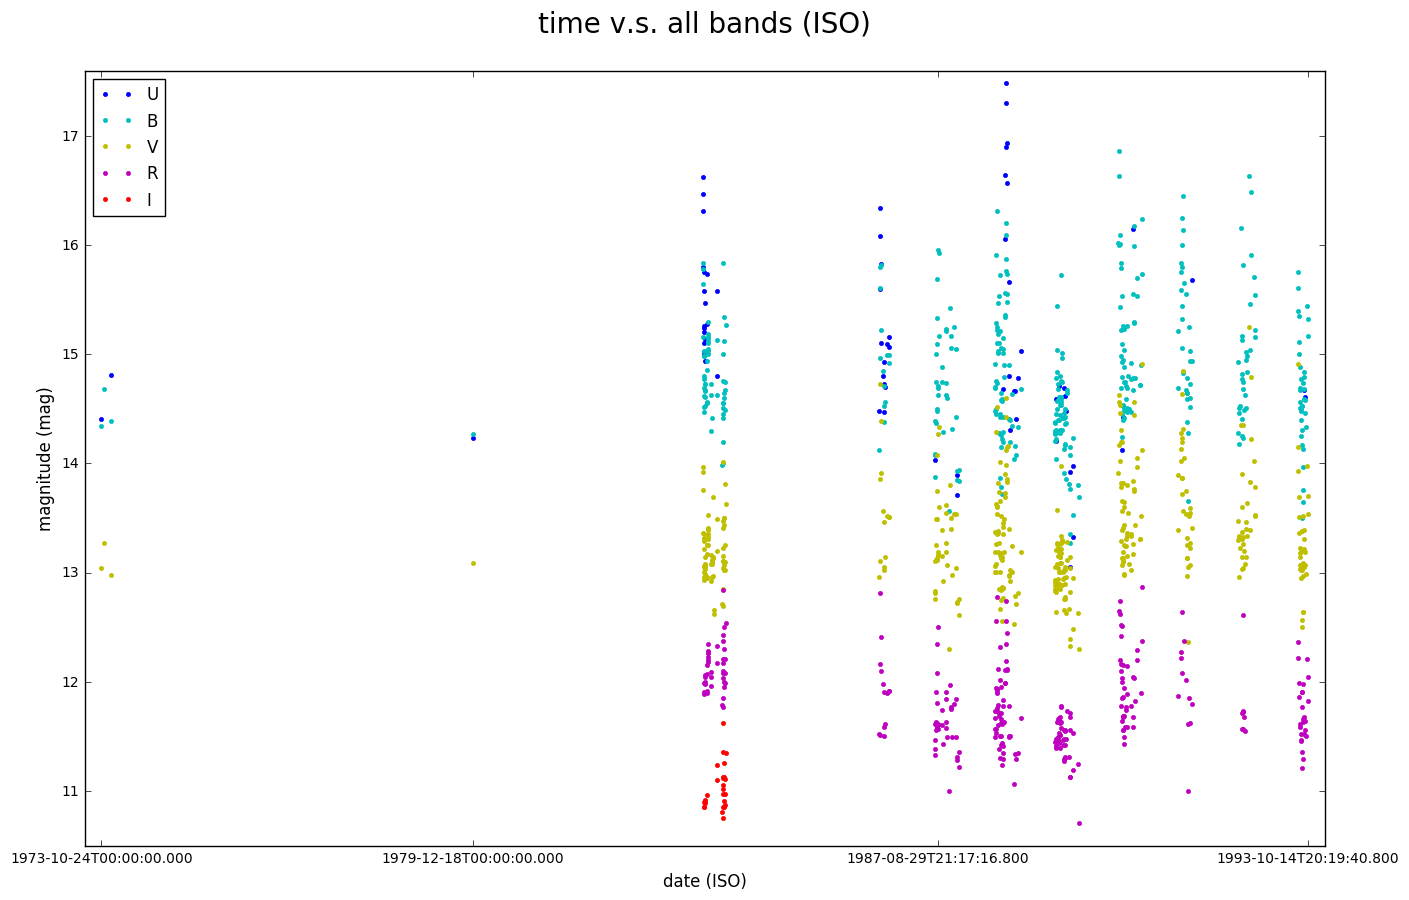

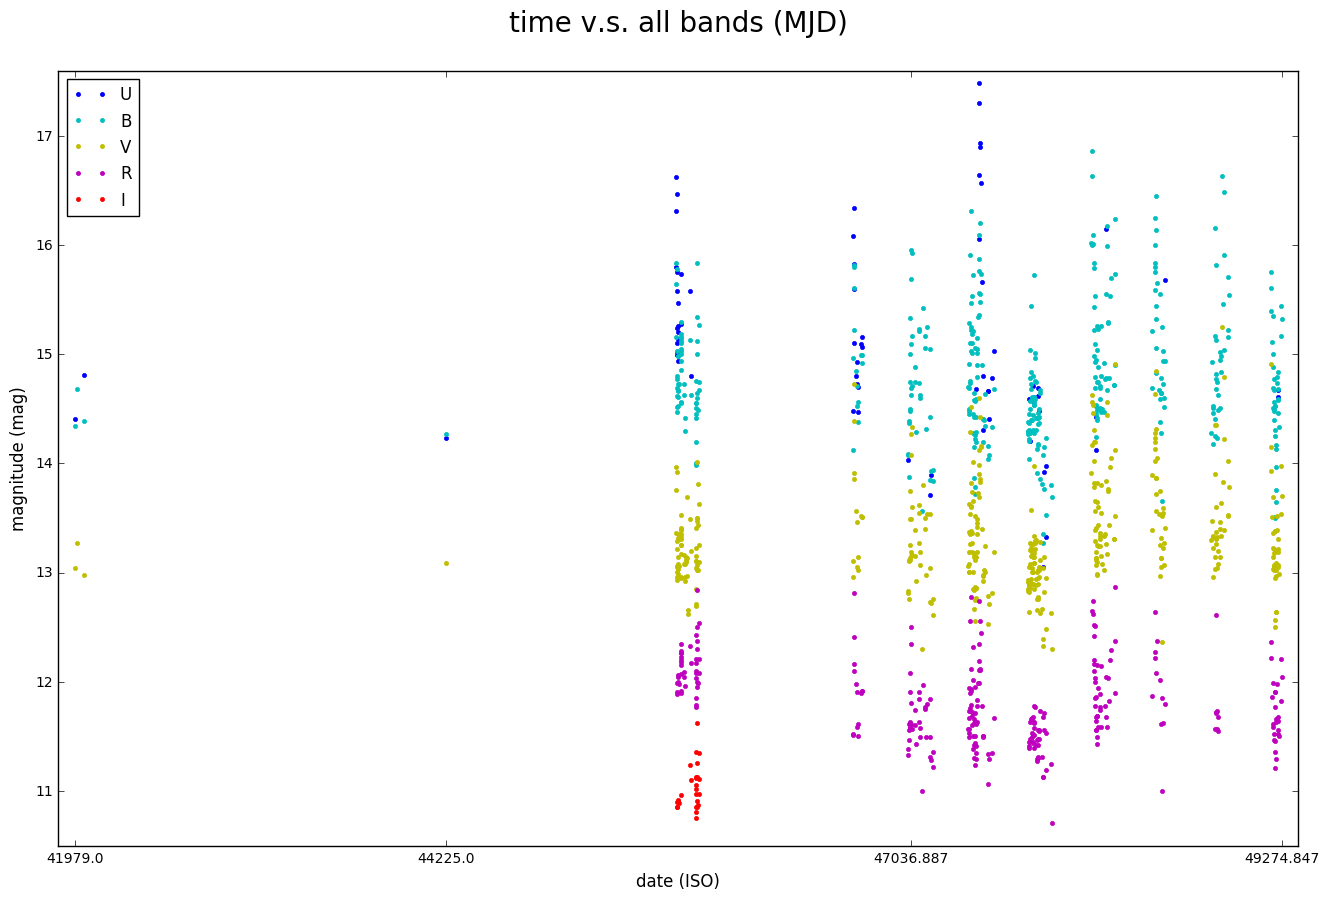

<SkyCoord (ICRS): (ra, dec) in deg
    (68.39190417, 24.35473333)>
<SkyCoord (Galactic): (l, b) in deg
    (174.21406527, -15.71284355)>
time now: 2016-10-04 17:59:00.933729


In [2]:
vstar=VariableStar('data.txt')
vstar.plot()
vstar.plotInMJD()
print(vstar.getRaDec())
print(vstar.getLB())
vstar.WhatsTime()
